# Importing The Libraries

In [1]:
import numpy as np
import cv2
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import os

In [3]:
from skimage.filters import roberts, sobel, scharr, prewitt
from scipy import ndimage as nd

In [4]:
import gif2numpy


# Extract Features from Images

In [9]:
# Next time change th path format
train_path = "D:\\Data sets\\DRIVE\\training"
train_ids = next(os.walk(train_path + "\\images"))[2]
gt_ids = next(os.walk(train_path + "\\1st_manual"))[2]

In [10]:
gt_ids

['21_manual1.gif',
 '22_manual1.gif',
 '23_manual1.gif',
 '24_manual1.gif',
 '25_manual1.gif',
 '26_manual1.gif',
 '27_manual1.gif',
 '28_manual1.gif',
 '29_manual1.gif',
 '30_manual1.gif',
 '31_manual1.gif',
 '32_manual1.gif',
 '33_manual1.gif',
 '34_manual1.gif',
 '35_manual1.gif',
 '36_manual1.gif',
 '37_manual1.gif',
 '38_manual1.gif',
 '39_manual1.gif',
 '40_manual1.gif']

In [11]:
train_ids

['21_training.tif',
 '22_training.tif',
 '23_training.tif',
 '24_training.tif',
 '25_training.tif',
 '26_training.tif',
 '27_training.tif',
 '28_training.tif',
 '29_training.tif',
 '30_training.tif',
 '31_training.tif',
 '32_training.tif',
 '33_training.tif',
 '34_training.tif',
 '35_training.tif',
 '36_training.tif',
 '37_training.tif',
 '38_training.tif',
 '39_training.tif',
 '40_training.tif']

In [21]:
path = train_path + "\\images\\" + '21_training.tif'
print(path)

img = cv2.imread(path)
img = img[:,:,1]

D:\Data sets\DRIVE\training\images\21_training.tif


# The Green Channel

In [28]:
def originalImg(img):
    plt.imshow(img, cmap = "gray")

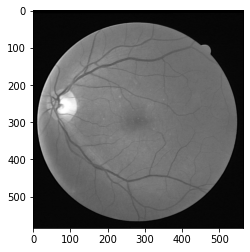

In [29]:
originalImg(img)

# Gabor Filters

In [38]:
def gaborFilter(img):
    #Generate Gabor features
    num = 1  
    kernels = []
    for theta in range(2):   
        theta = theta / 4. * np.pi
        for sigma in (1, 3): 
            for lamda in np.arange(0, np.pi, np.pi / 4):   
                for gamma in (0.05, 0.5):


                    gabor_label = 'Gabor' + str(num)
                    # print(gabor_label)
                    ksize=5
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    
                    fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                    print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                    num += 1  #Increment for gabor column label
                    
                    fig, axes = plt.subplots(1, 3, figsize=(20, 20))
                    ax = axes.ravel()
                    ax[0].set_title("Orinal Image")
                    ax[0].imshow(img, cmap = 'gray')
                    ax[1].set_title("Kernel")
                    ax[1].imshow(kernel, cmap = 'gray')
                    ax[2].set_title("Filtered Image")
                    ax[2].imshow(fimg, cmap = 'gray')
    

Gabor1 : theta= 0.0 : sigma= 2 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 2 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 2 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 2 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 2 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 2 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 2 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 2 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 4 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 4 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 4 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 4 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 4 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 4 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 4 : lamda= 2

<ipython-input-38-eb6f74b56f29>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 3, figsize=(20, 20))


Gabor24 : theta= 0.7853981633974483 : sigma= 2 : lamda= 2.356194490192345 : gamma= 0.5
Gabor25 : theta= 0.7853981633974483 : sigma= 4 : lamda= 0.0 : gamma= 0.05
Gabor26 : theta= 0.7853981633974483 : sigma= 4 : lamda= 0.0 : gamma= 0.5
Gabor27 : theta= 0.7853981633974483 : sigma= 4 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor28 : theta= 0.7853981633974483 : sigma= 4 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor29 : theta= 0.7853981633974483 : sigma= 4 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor30 : theta= 0.7853981633974483 : sigma= 4 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor31 : theta= 0.7853981633974483 : sigma= 4 : lamda= 2.356194490192345 : gamma= 0.05
Gabor32 : theta= 0.7853981633974483 : sigma= 4 : lamda= 2.356194490192345 : gamma= 0.5


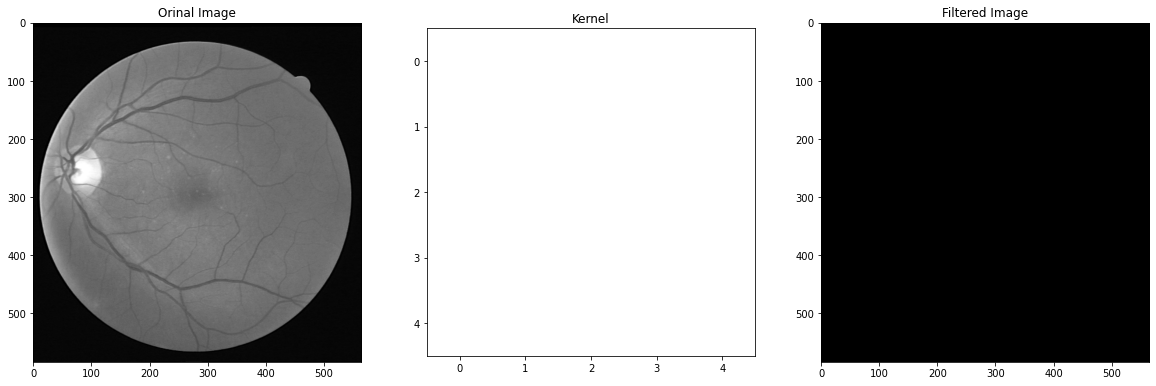

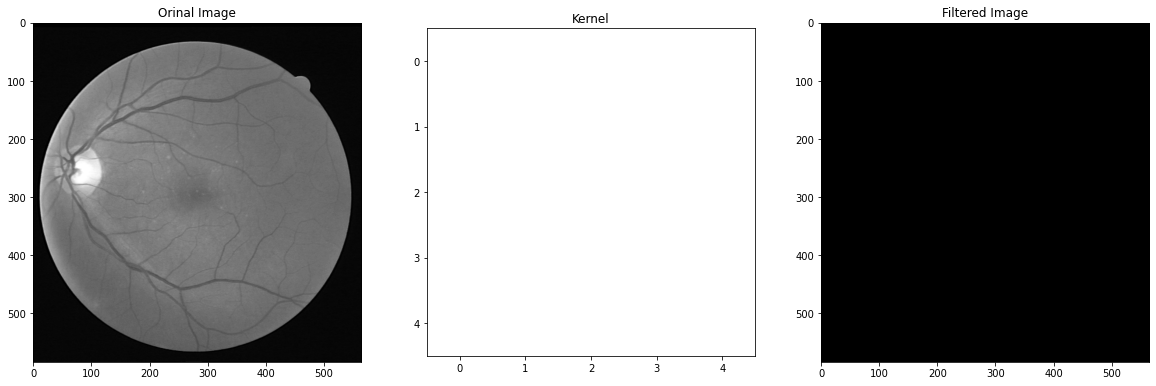

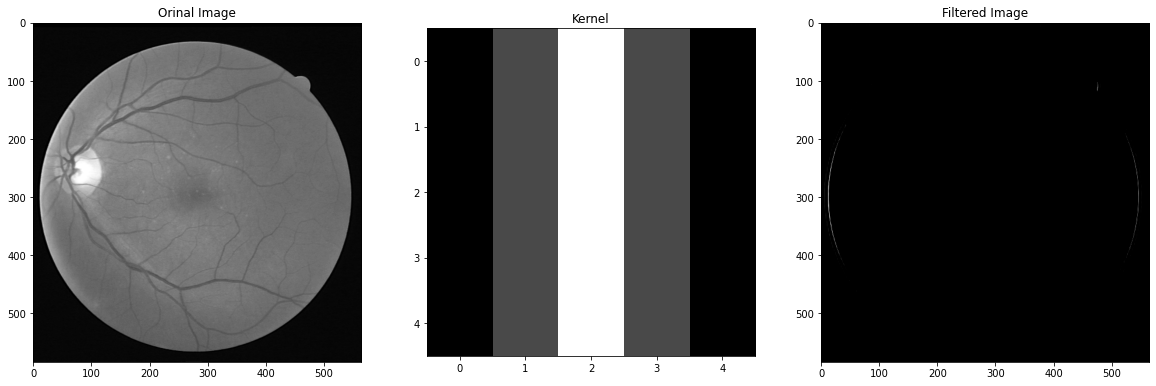

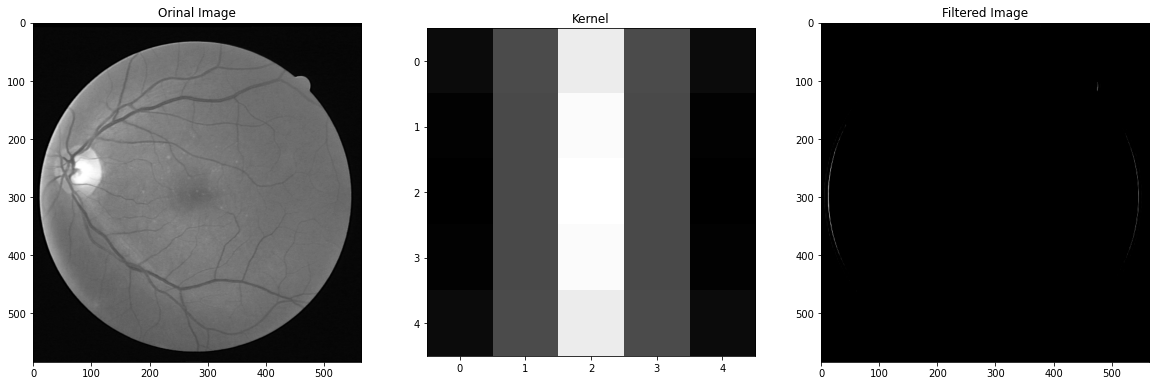

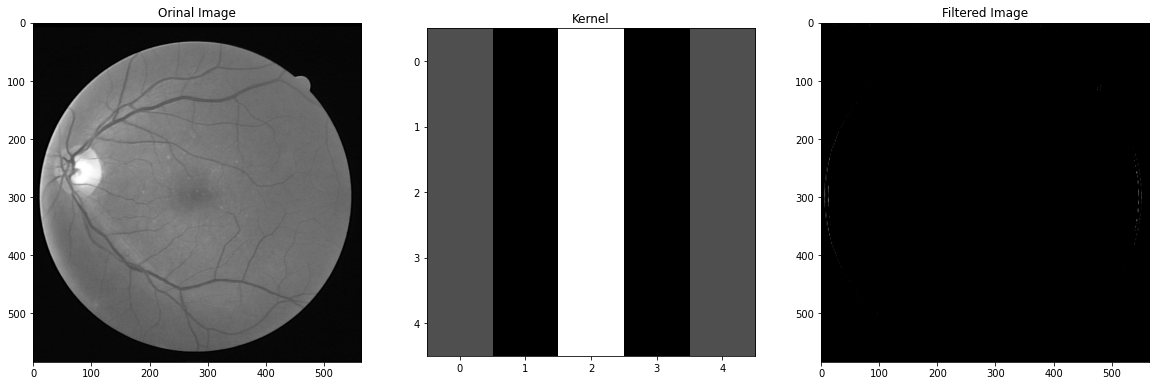

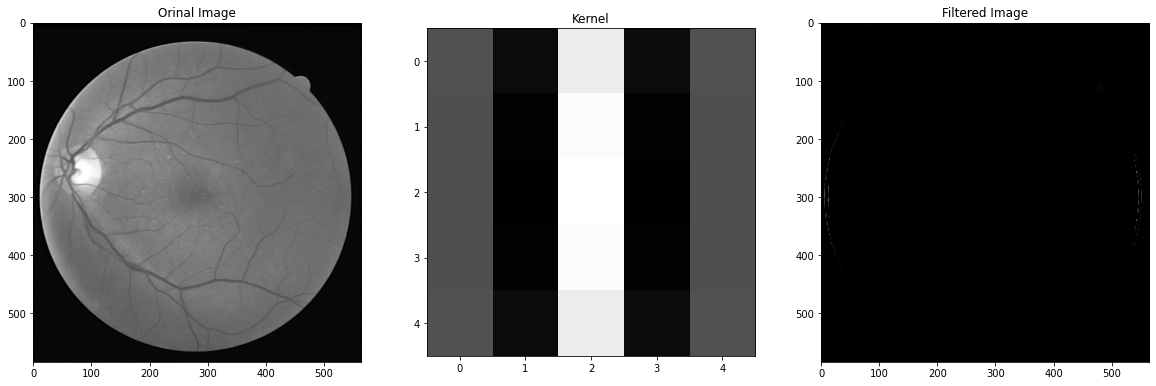

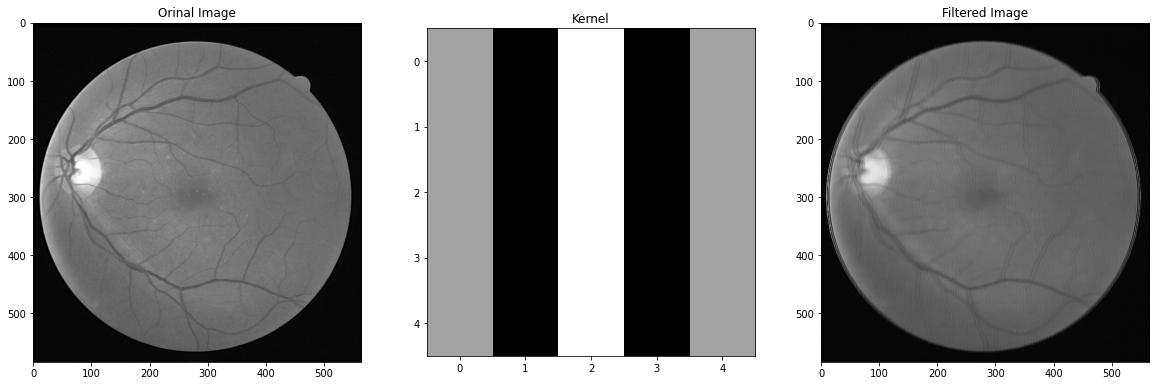

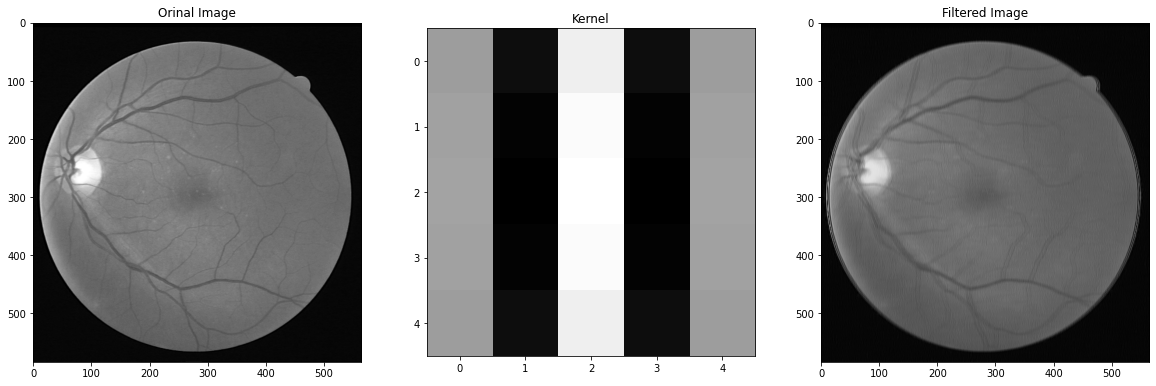

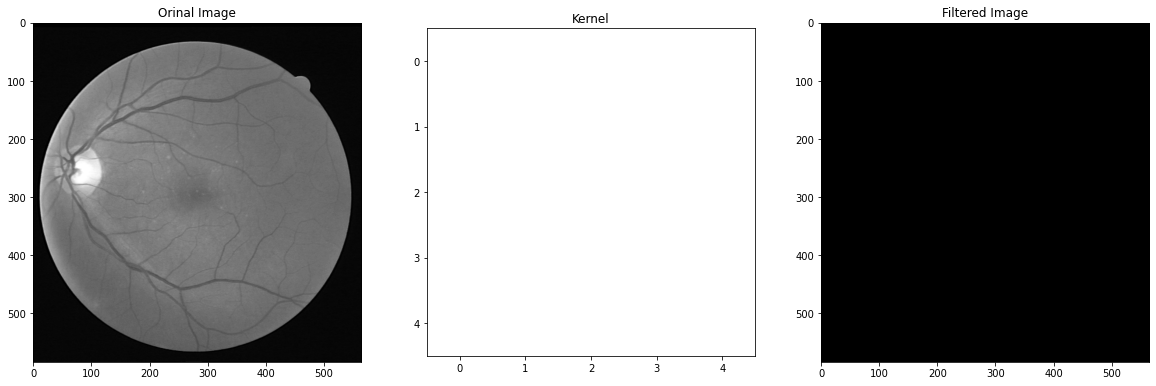

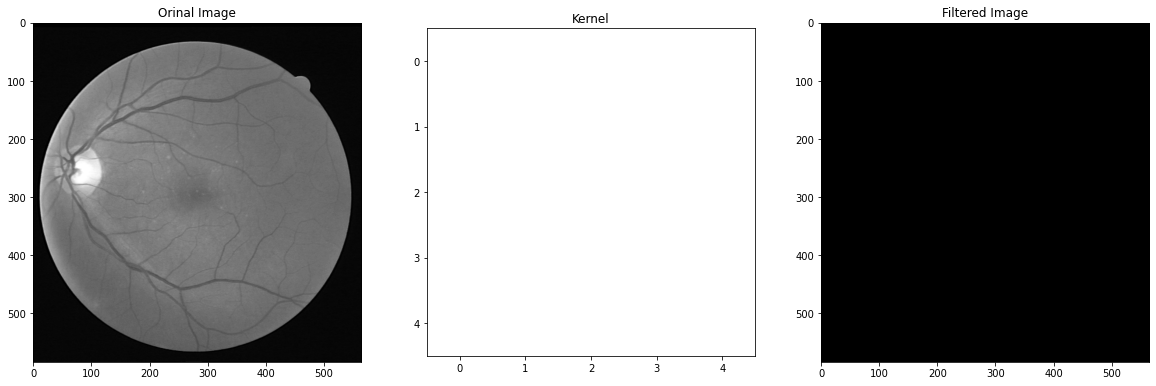

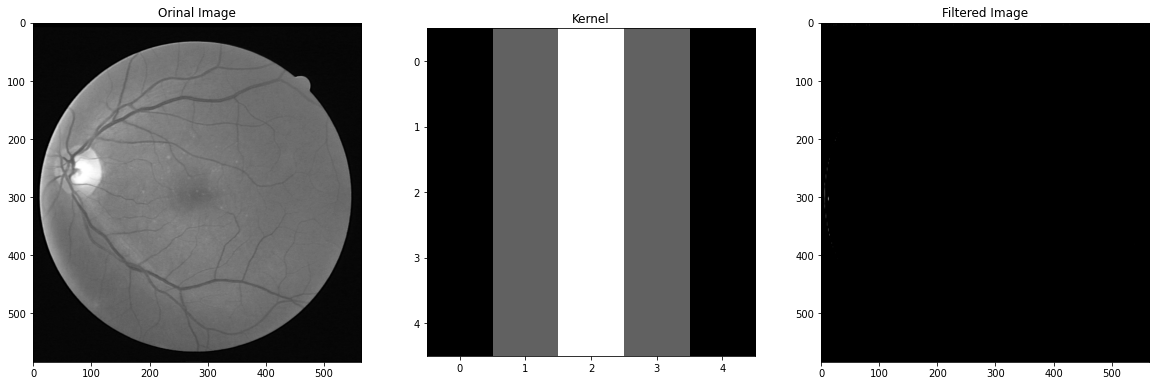

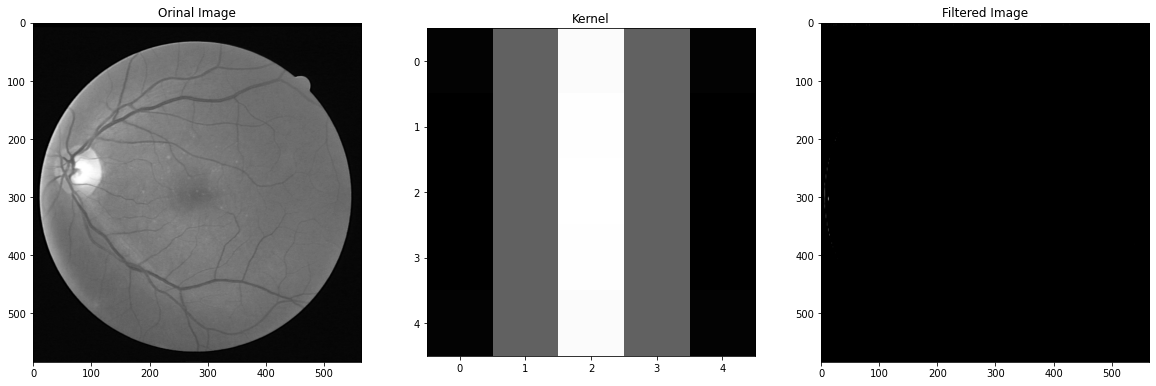

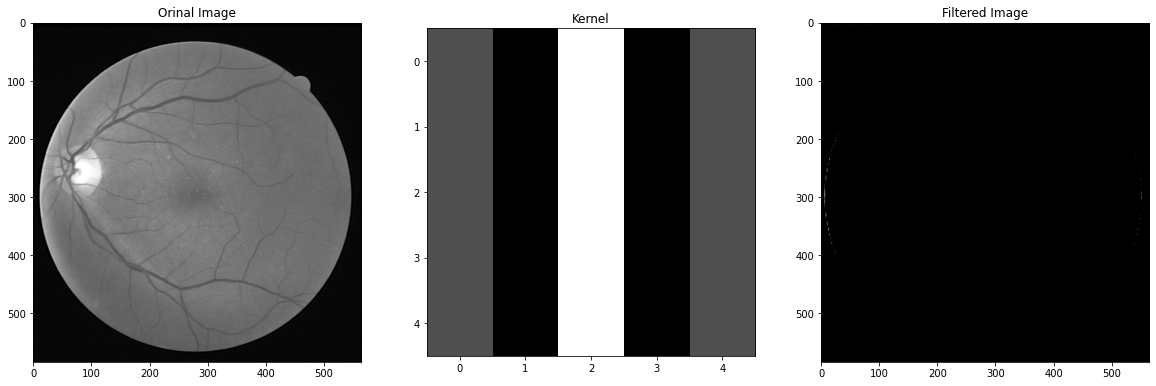

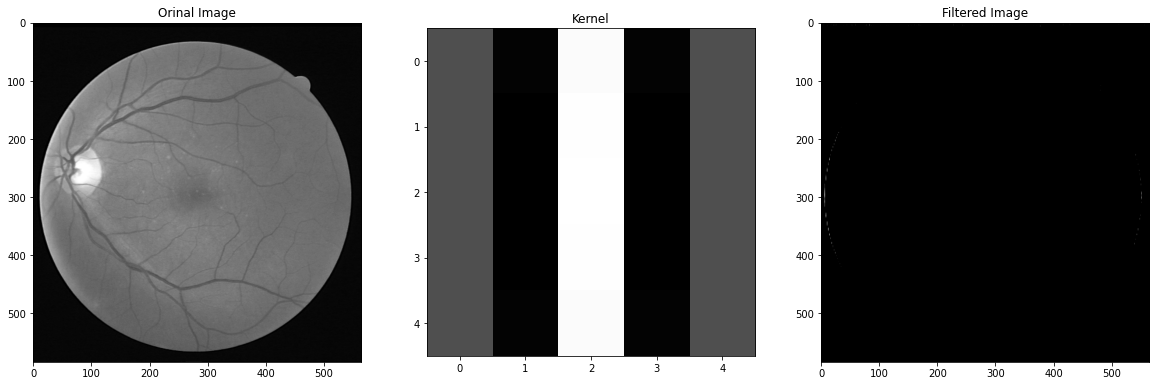

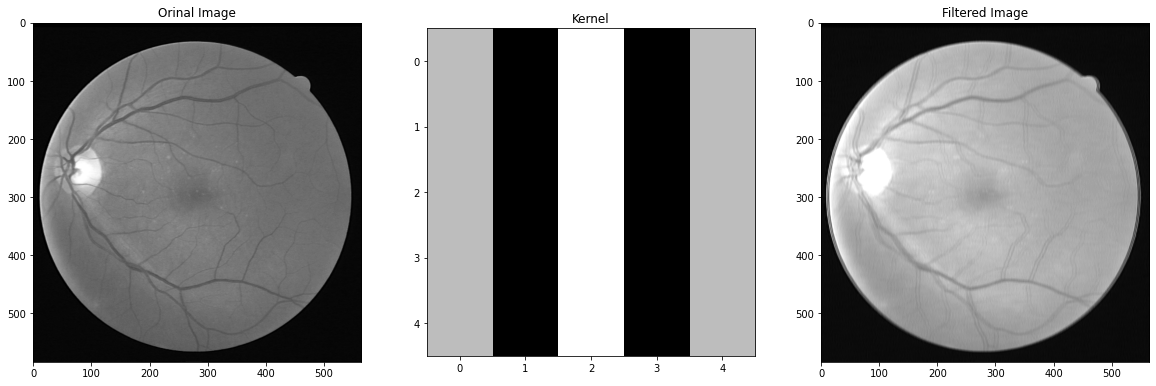

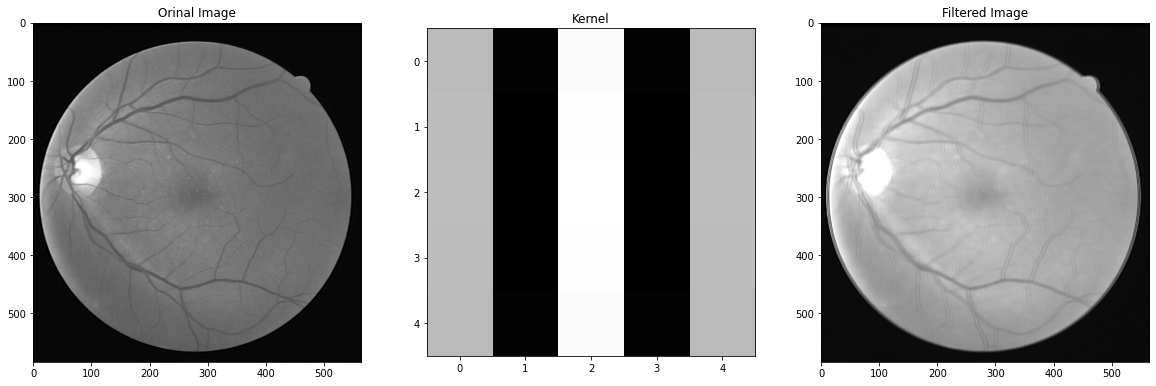

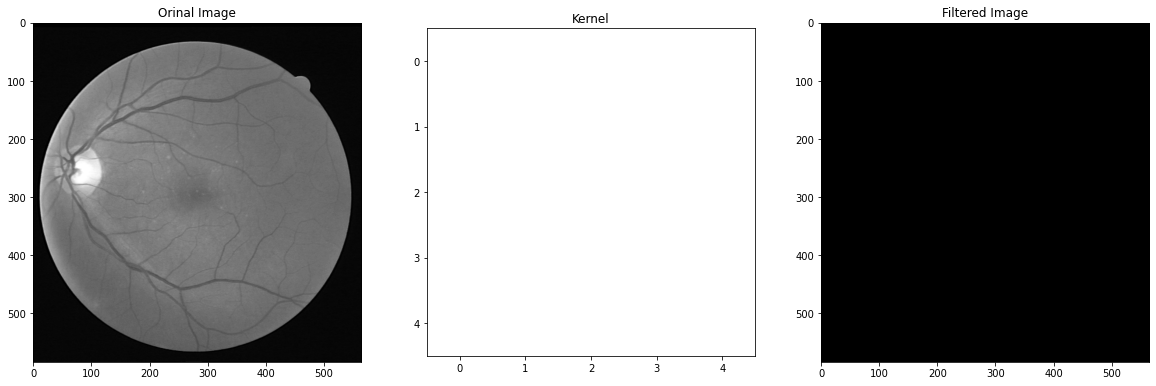

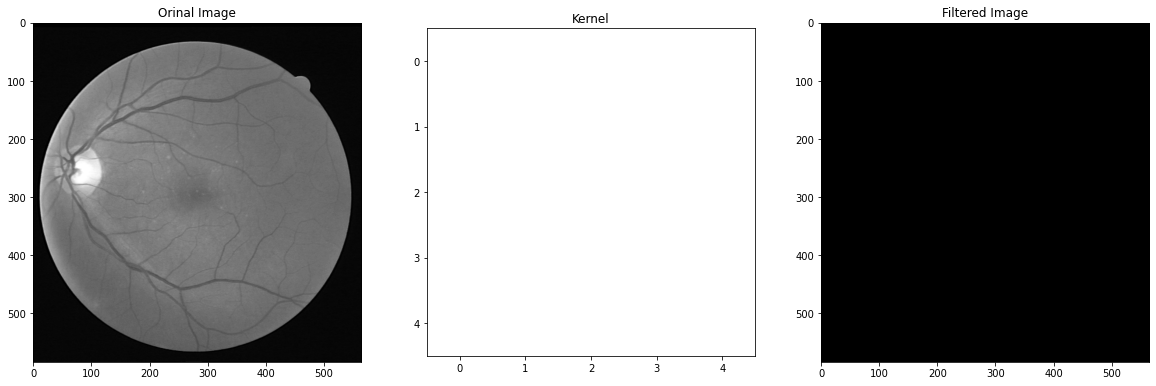

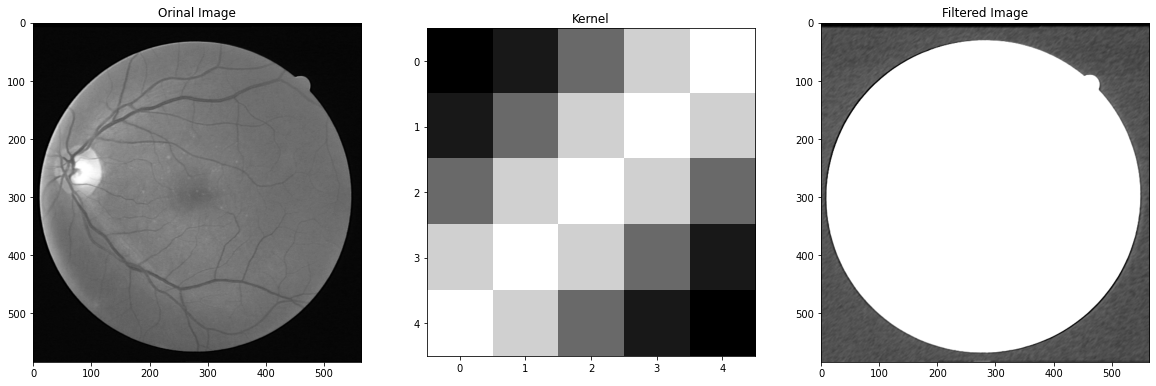

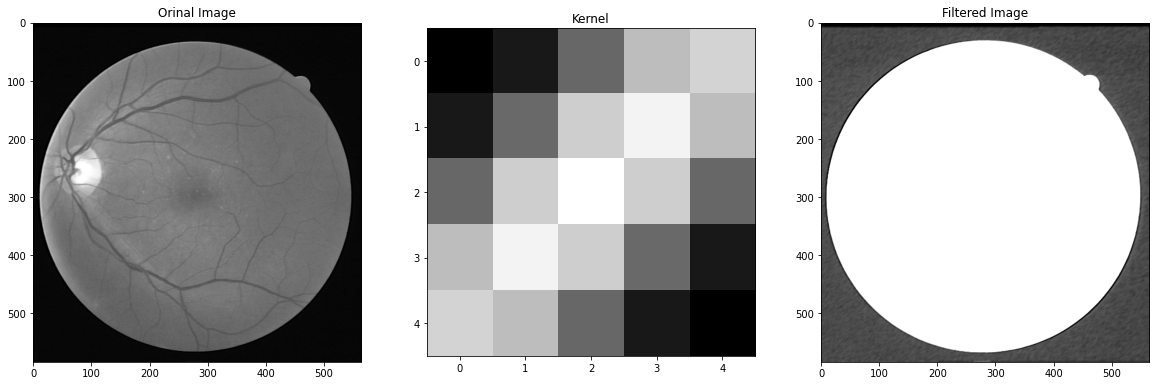

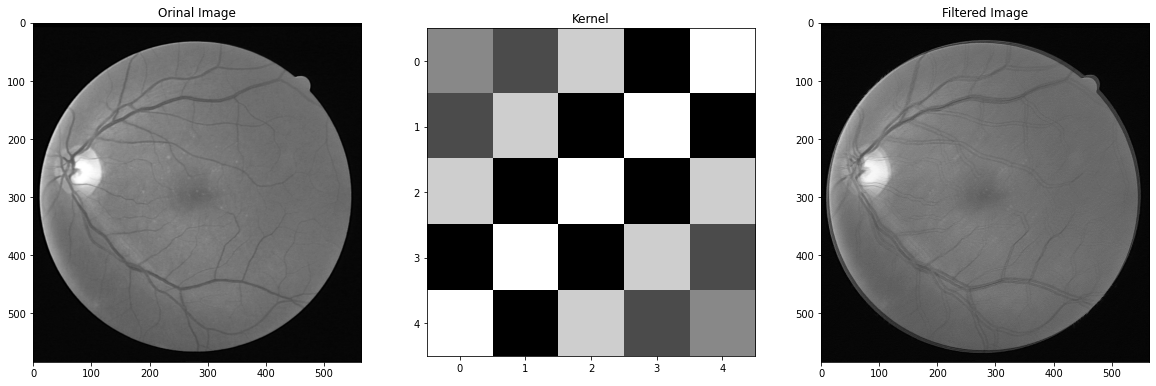

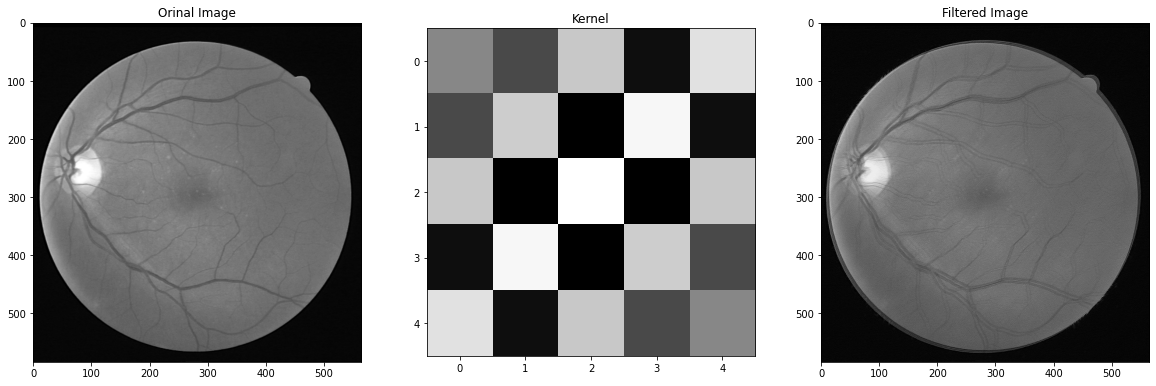

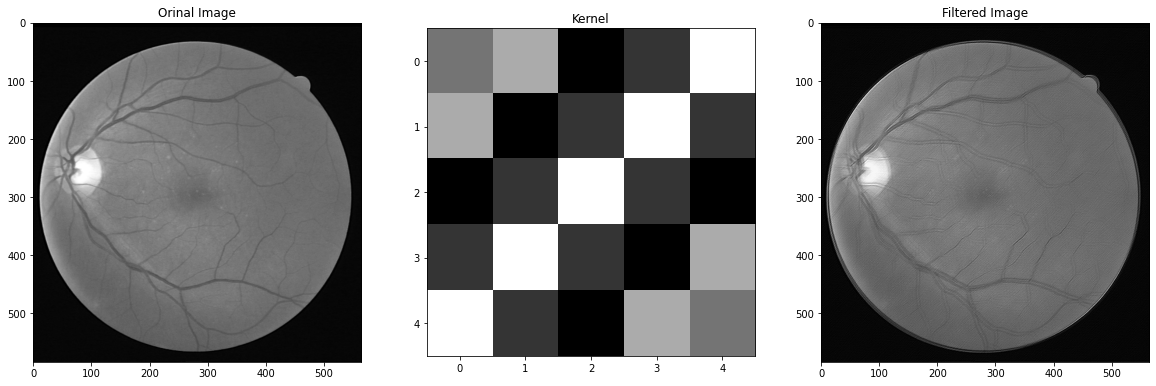

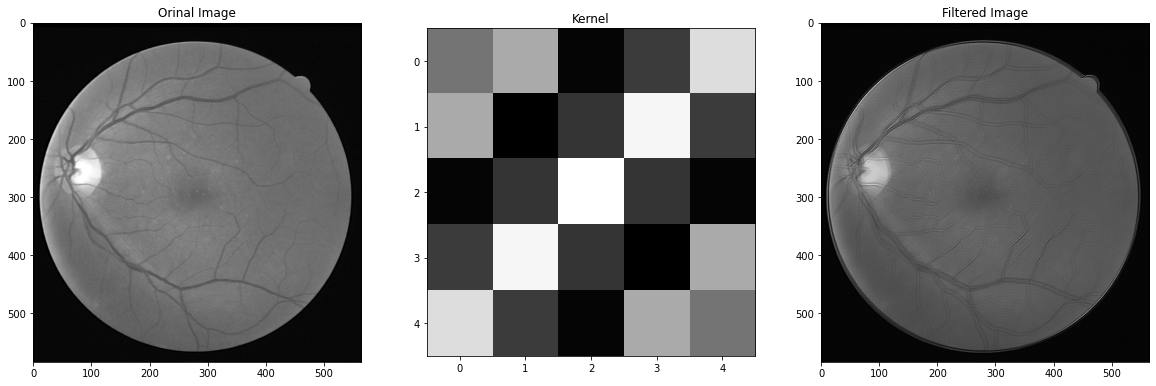

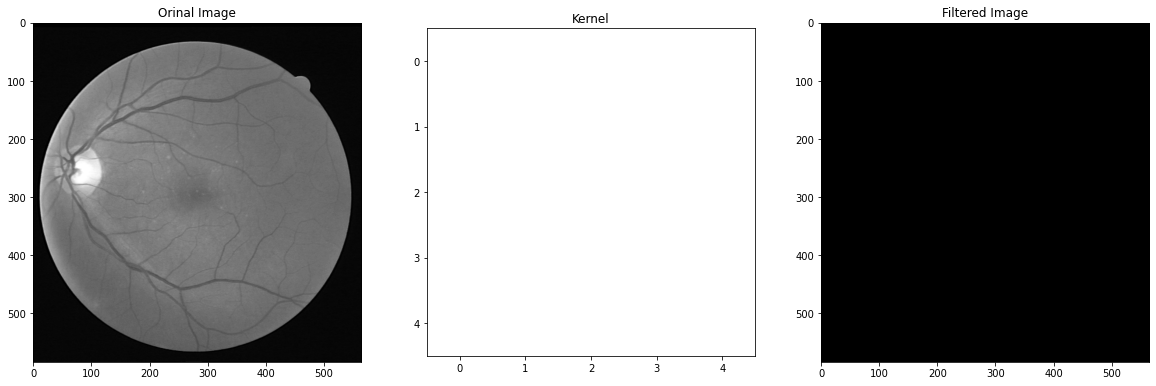

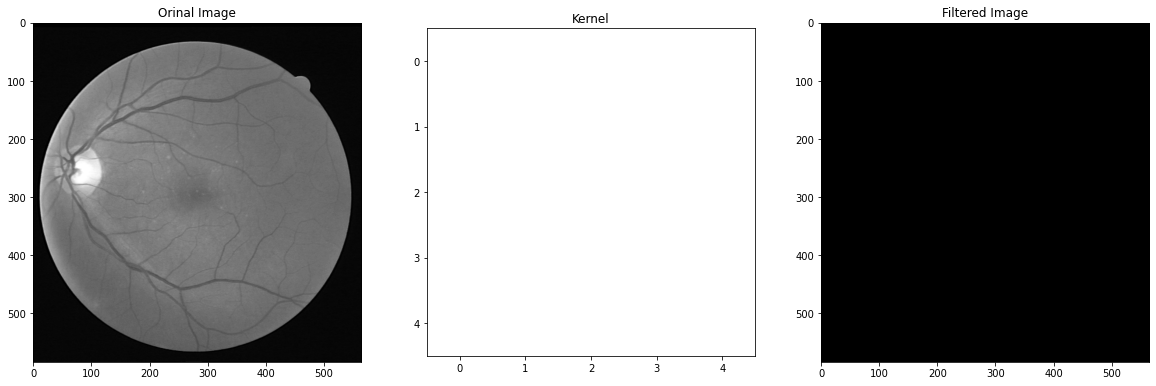

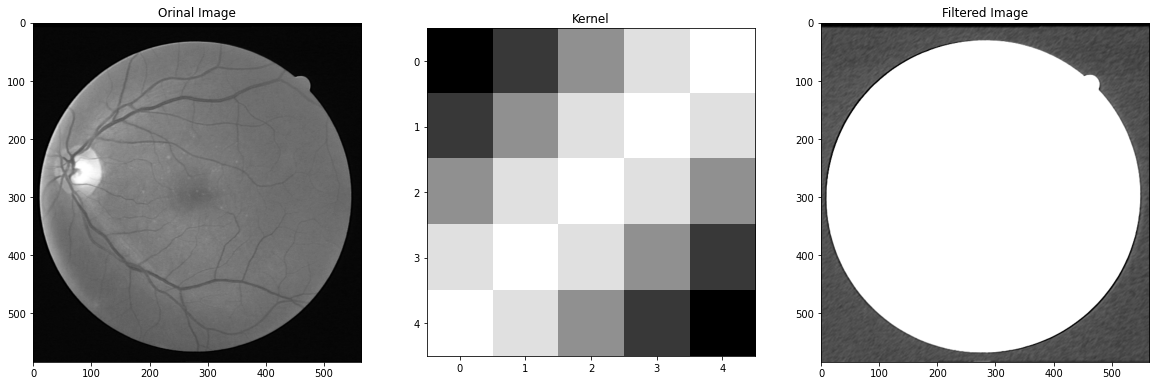

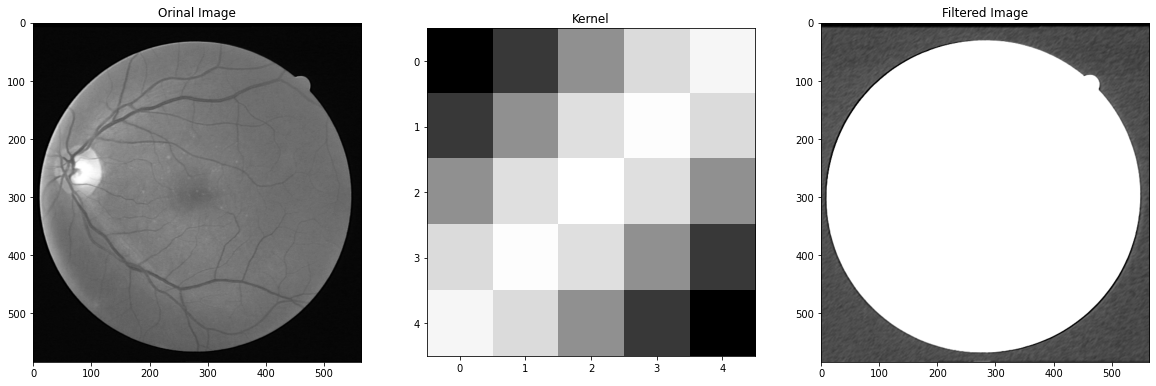

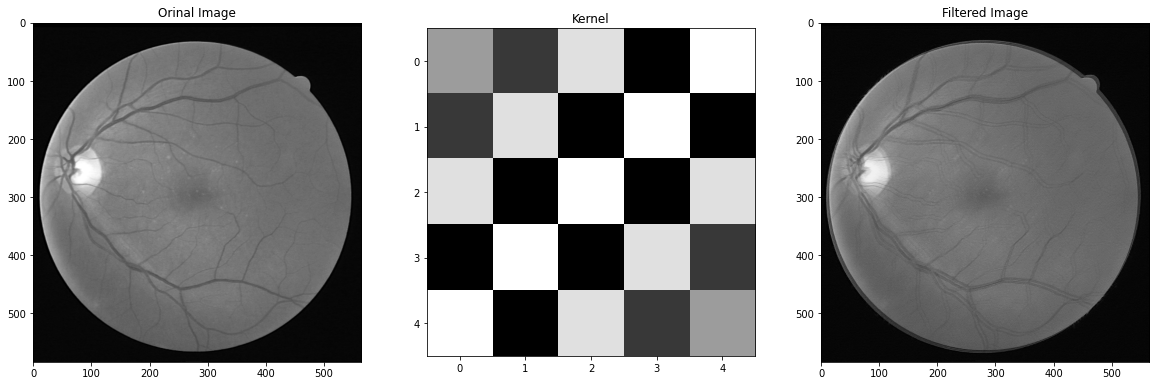

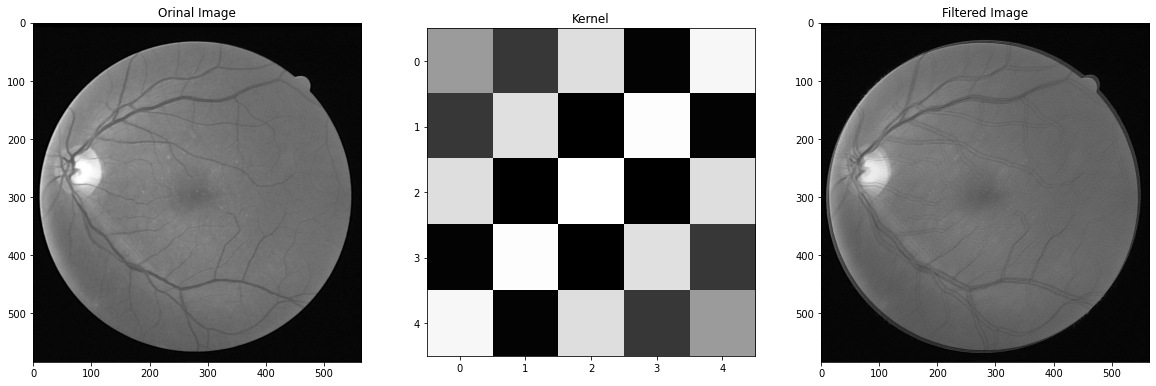

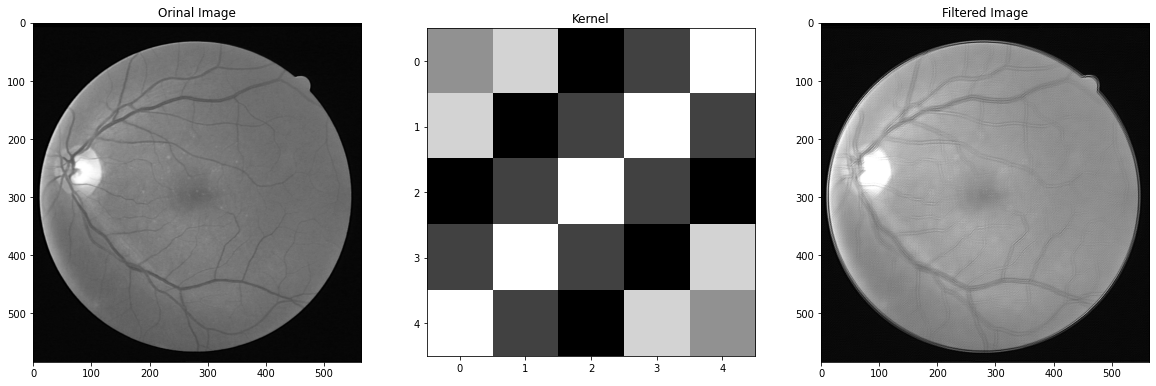

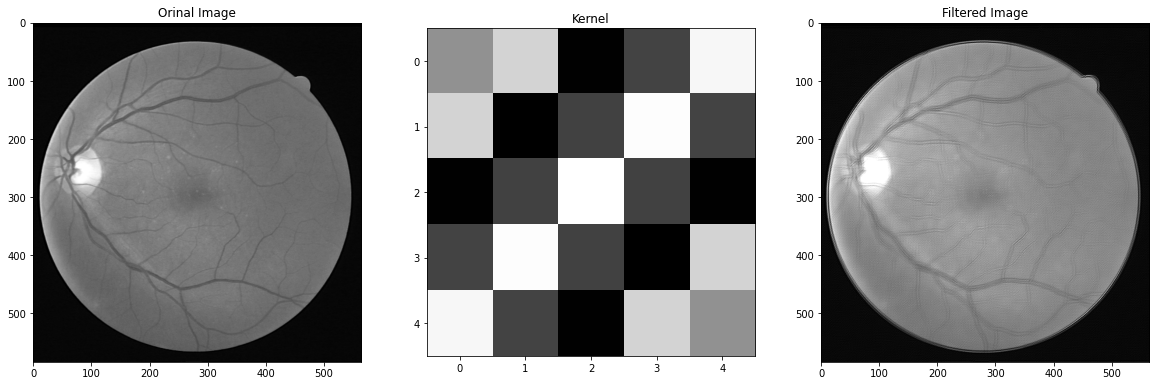

In [39]:
gaborFilter(img)

# Canny Edge

In [50]:
def cannyEdge(img):
    #CANNY EDGE
    edges = cv2.Canny(img, 10,300)   #Image, min and max values
    plt.imshow(edges, cmap = "gray")

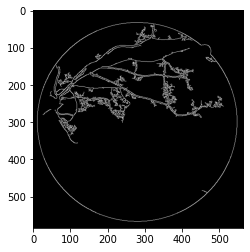

In [51]:
cannyEdge(img)

# The 4 Edge Detectors

In [52]:
def the4edgeDetectors(img):
    edge_roberts = roberts(img)
    
    #SOBEL
    edge_sobel = sobel(img)
    
    #SCHARR
    edge_scharr = scharr(img)
    
    #PREWITT
    edge_prewitt = prewitt(img)
    
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    ax = axes.ravel()
    ax[0].set_title("Orinal Image")
    ax[0].imshow(img, cmap = 'gray')
    ax[1].set_title("Robert")
    ax[1].imshow(edge_roberts, cmap = 'gray')
    ax[2].set_title("Sobel")
    ax[2].imshow(edge_sobel, cmap = 'gray')
    ax[3].set_title("Scharr")
    ax[3].imshow(edge_scharr, cmap = 'gray')
    ax[4].set_title("Prewitt")
    ax[4].imshow(edge_prewitt, cmap = 'gray')


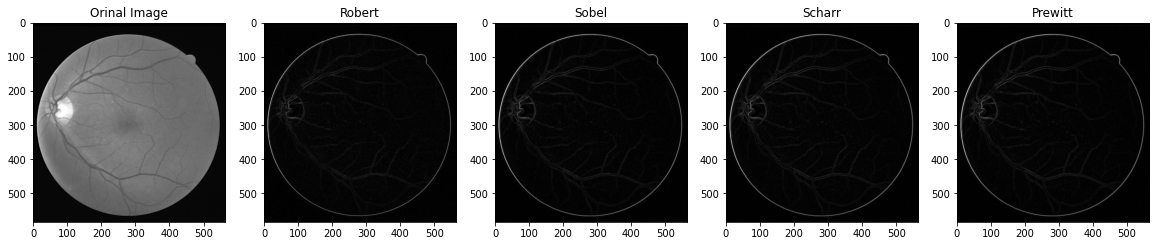

In [53]:
the4edgeDetectors(img)

In [12]:
def gmv(df,img):
    #GAUSSIAN with sigma=3

    gaussian_img = nd.gaussian_filter(img, sigma=3)
    gaussian_img1 = gaussian_img.reshape(-1)
    df['Gaussian s3'] = gaussian_img1

    #GAUSSIAN with sigma=7
    gaussian_img2 = nd.gaussian_filter(img, sigma=7)
    gaussian_img3 = gaussian_img2.reshape(-1)
    df['Gaussian s7'] = gaussian_img3

    #MEDIAN with sigma=3
    median_img = nd.median_filter(img, size=3)
    median_img1 = median_img.reshape(-1)
    df['Median s3'] = median_img1

    #VARIANCE with size=3
    variance_img = nd.generic_filter(img, np.var, size=3)
    variance_img1 = variance_img.reshape(-1)
    df['Variance s3'] = variance_img1  #Add column to original dataframe
    return df

In [13]:
def gtImage(gt_path,df):
    frames, exts, image_specs = gif2numpy.convert(gt_path)
    frames = np.array(frames)
    labeled_img = frames.reshape(584, 565,3)
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
    thresh = 0
    labeled_img = labeled_img > 0
    labeled_img1 = labeled_img.reshape(-1)
    df['Labels'] = labeled_img1
    return df